In [181]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#Asking python to ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [182]:
import pandas as pd
CU= pd.read_csv(r"C:\Users\chyj2\OneDrive\Datasets For employment\Daily_Inmates.csv")
CU.sample(10)

,INMATEID,ADMITTED_DT,DISCHARGED_DT,CUSTODY_LEVEL,BRADH,RACE,GENDER,AGE,INMATE_STATUS_CODE,SEALED,SRG_FLG,TOP_CHARGE,INFRACTION
2818,20229528,3/20/2025 10:54,NaN,MED,N,B,M,35.0,SSR,N,N,NaN,N
7227,10001573,5/28/2025 12:48,NaN,MIN,Y,O,M,62.0,DE,N,N,140.2,N
7105,69029,7/7/2025 13:04,NaN,MIN,N,B,M,57.0,DNS,N,N,220.09,N
3890,151616,3/18/2025 12:04,NaN,MAX,Y,B,M,47.0,SSR,N,Y,NaN,N
6134,20232264,5/28/2025 16:26,NaN,MED,N,B,M,26.0,DE,N,Y,125.25,N
1459,20153631,12/29/2024 19:58,NaN,MAX,Y,O,M,28.0,DE,N,Y,220.16,Y
5762,20243068,6/28/2025 0:11,NaN,MIN,N,O,M,33.0,DE,N,N,155.3,N
7451,20244544,7/6/2025 23:37,NaN,MIN,N,B,M,59.0,DE,N,N,110-125.25,N
4217,20019729,6/8/2025 20:14,NaN,MIN,N,B,M,33.0,DE,N,N,120.05,N
6451,20003267,3/12/2025 17:11,NaN,MED,N,B,M,47.0,SSR,N,N,NaN,N


In [183]:
#  to investigate the number of attributes inn the dataset
CU.shape

(7622, 13)

In [163]:
# chect the various data types and their quatities
CU.dtypes

INMATEID                int64
ADMITTED_DT            object
DISCHARGED_DT         float64
CUSTODY_LEVEL          object
BRADH                  object
RACE                   object
GENDER                 object
AGE                   float64
INMATE_STATUS_CODE     object
SEALED                 object
SRG_FLG                object
TOP_CHARGE             object
INFRACTION             object
dtype: object

In [185]:
 #comprihensive information about the dataset
CU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7622 entries, 0 to 7621
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INMATEID            7622 non-null   int64  
 1   ADMITTED_DT         7622 non-null   object 
 2   DISCHARGED_DT       0 non-null      float64
 3   CUSTODY_LEVEL       7565 non-null   object 
 4   BRADH               7622 non-null   object 
 5   RACE                7606 non-null   object 
 6   GENDER              7606 non-null   object 
 7   AGE                 7621 non-null   float64
 8   INMATE_STATUS_CODE  7622 non-null   object 
 9   SEALED              7622 non-null   object 
 10  SRG_FLG             7622 non-null   object 
 11  TOP_CHARGE          6595 non-null   object 
 12  INFRACTION          7622 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 774.2+ KB


DATA CLEANING

In [186]:
# CHECK FOR DUPLICATES
CU.duplicated().sum()

0

In [187]:
#Check for missing values
# checking for missing values in the price data
CU.isna().sum()

INMATEID                 0
ADMITTED_DT              0
DISCHARGED_DT         7622
CUSTODY_LEVEL           57
BRADH                    0
RACE                    16
GENDER                  16
AGE                      1
INMATE_STATUS_CODE       0
SEALED                   0
SRG_FLG                  0
TOP_CHARGE            1027
INFRACTION               0
dtype: int64

In [188]:
CU['AGE'] =CU['AGE'].fillna(CU['AGE'].mean())

In [189]:
CU.isna().sum()

INMATEID                 0
ADMITTED_DT              0
DISCHARGED_DT         7622
CUSTODY_LEVEL           57
BRADH                    0
RACE                    16
GENDER                  16
AGE                      0
INMATE_STATUS_CODE       0
SEALED                   0
SRG_FLG                  0
TOP_CHARGE            1027
INFRACTION               0
dtype: int64

In [190]:
# Quick examples of extracting day, month, and year from datetime

# Example 1: Using dt accessor to extract day               
CU["ADMITTED_DT"]= pd.to_datetime(CU[ "ADMITTED_DT"])
CU['DayOfMonth']=CU["ADMITTED_DT"].dt.day

# Example 2: Using dt accessor to extract month                  
CU["ADMITTED_DT"]= pd.to_datetime(CU[ "ADMITTED_DT"])
CU['Month']=CU[ "ADMITTED_DT"].dt.month

# Example 3: Using dt accessor to extract year                     
CU["ADMITTED_DT"]= pd.to_datetime(CU[ "ADMITTED_DT"])
CU['Year']=CU[ "ADMITTED_DT"].dt.year

CU['hour']=CU[ "ADMITTED_DT"].dt.hour



In [191]:
# Quick examples of extracting day, month, and year from datetime

# Example 1: Using dt accessor to extract day               
CU["ADMITTED_DT"]= pd.to_datetime(CU[ "ADMITTED_DT"])
CU['DayOfMonth']=CU["ADMITTED_DT"].dt.day

# Example 2: Using dt accessor to extract month                  
CU["ADMITTED_DT"]= pd.to_datetime(CU[ "ADMITTED_DT"])
CU['Month']=CU[ "ADMITTED_DT"].dt.month

# Example 3: Using dt accessor to extract year                     
CU["ADMITTED_DT"]= pd.to_datetime(CU[ "ADMITTED_DT"])
CU['Year']=CU[ "ADMITTED_DT"].dt.year

CU['hour']=CU[ "ADMITTED_DT"].dt.hour


In [192]:
# DROP IRRELEVANT COLUMNS
CU = CU.drop(['DISCHARGED_DT', 'INMATEID', 'ADMITTED_DT'],axis=1)


EXPLORATORY DATA ANALYSIS

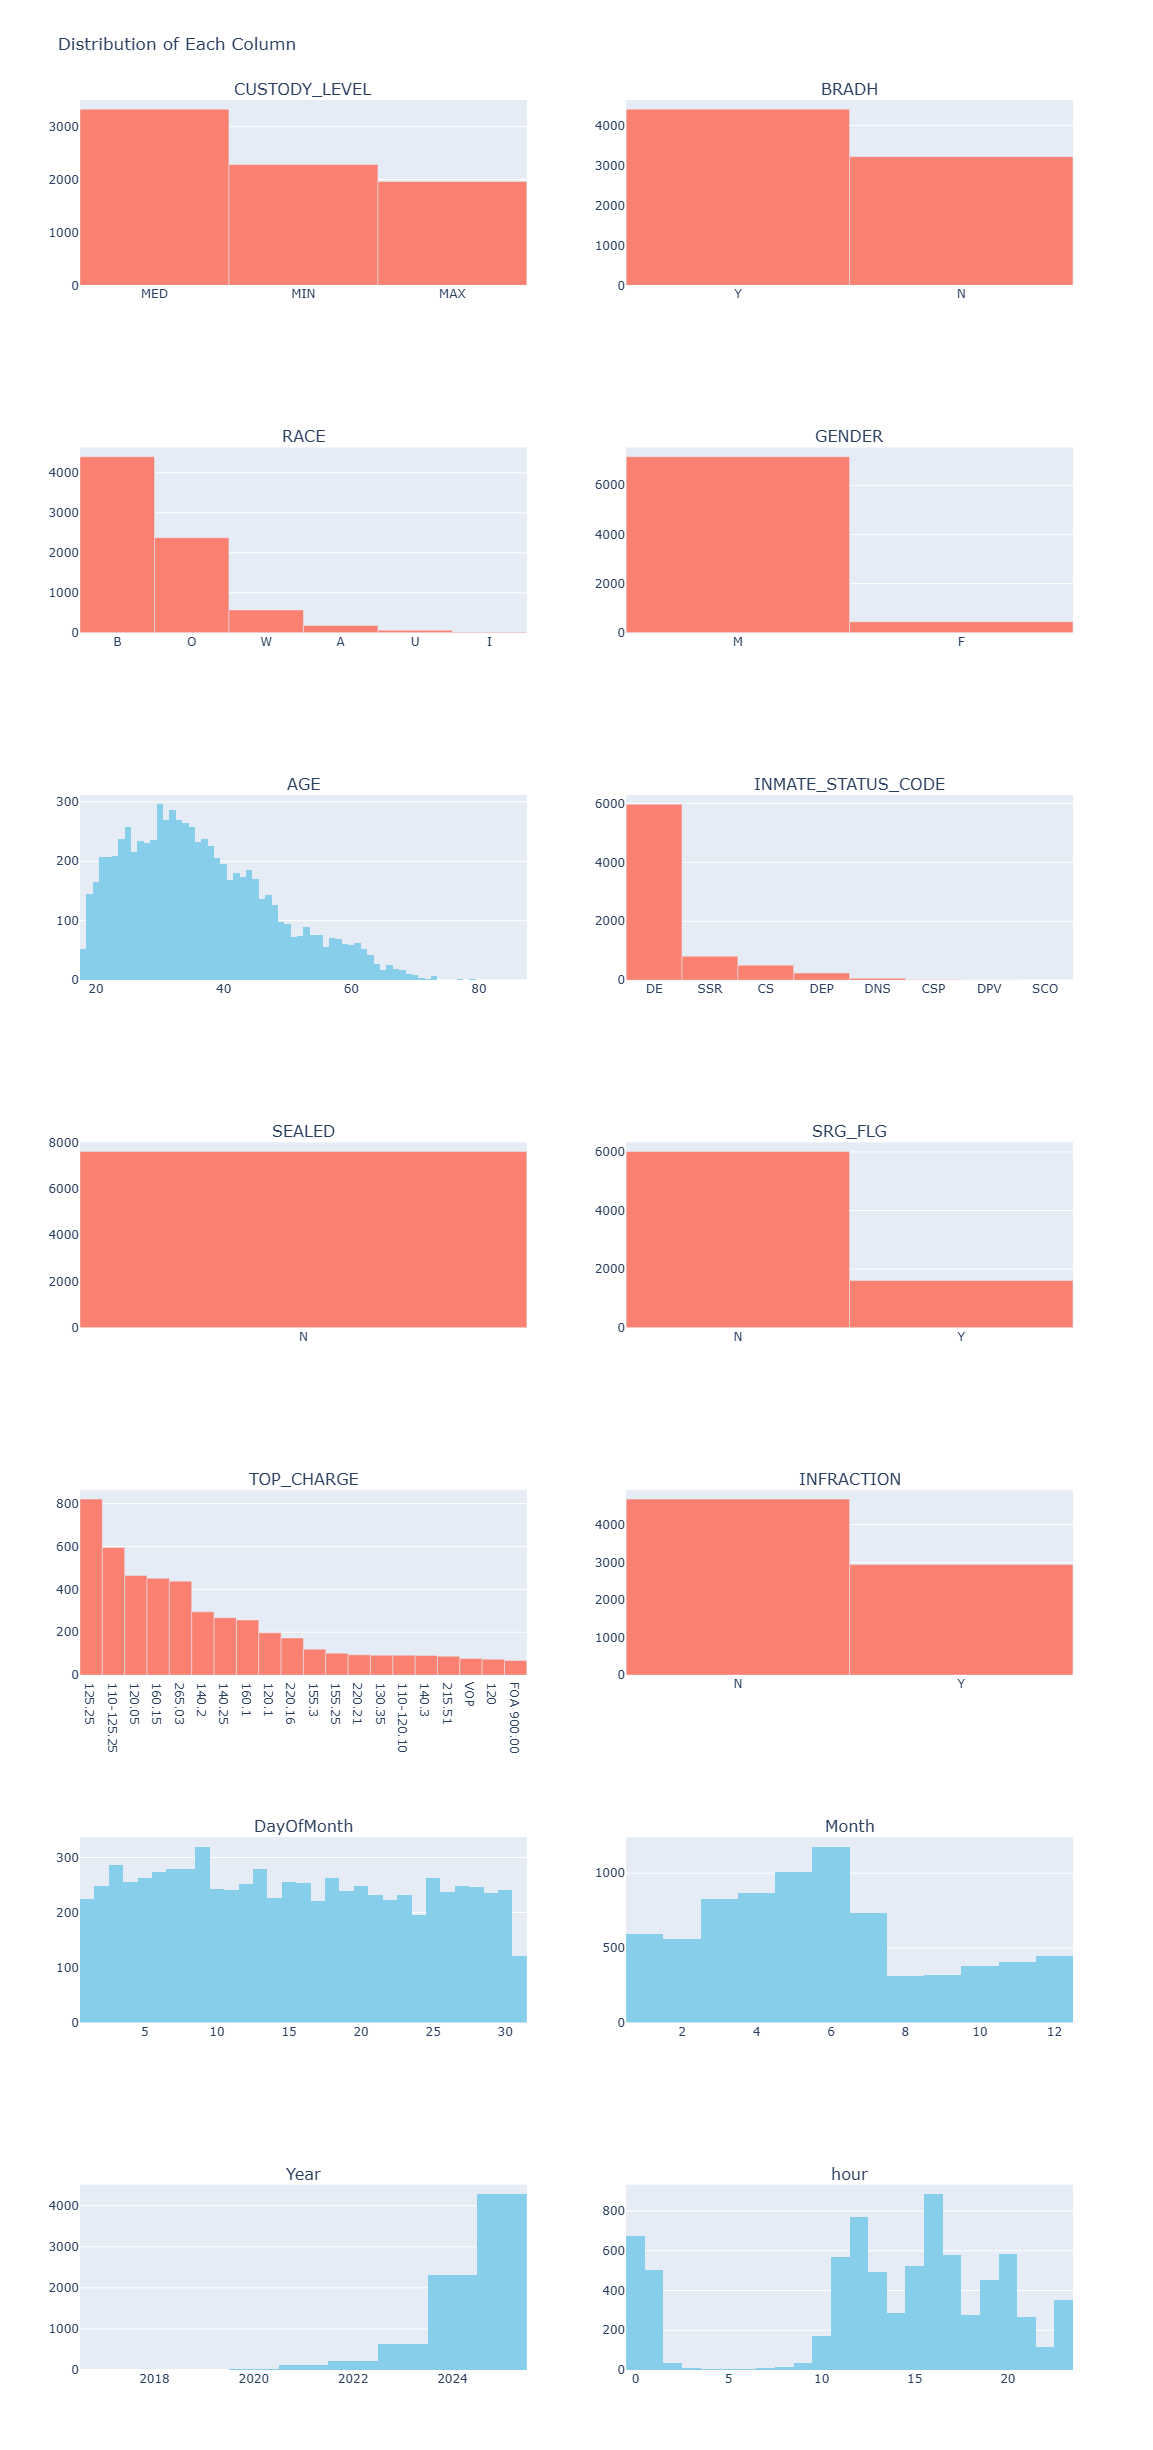

In [193]:
from plotly.subplots import make_subplots

import plotly.graph_objects as go

# Identify numeric and categorical columns
numeric_cols = CU.select_dtypes(include='number').columns
categorical_cols = CU.select_dtypes(include='object').columns

total_cols = len(CU.columns)
rows = (total_cols + 1) // 2

fig = make_subplots(rows=rows, cols=2, subplot_titles=CU.columns)
for i, col in enumerate(CU.columns):
    row = i // 2 + 1
    col_pos = i % 2 + 1
    if col in numeric_cols:
        fig.add_trace(
            go.Histogram(x=CU[col], name=col, marker_color='skyblue'),
            row=row, col=col_pos
        )
    else:
        value_counts = CU[col].value_counts().sort_values(ascending=False)[:20]  # top 20 for readability
        fig.add_trace(
            go.Bar(x=value_counts.index, y=value_counts.values, name=col, marker_color='salmon'),
            row=row, col=col_pos
        )

fig.update_layout(height=rows*350, width=1000, title_text="Distribution of Each Column", showlegend=False)
fig.show()

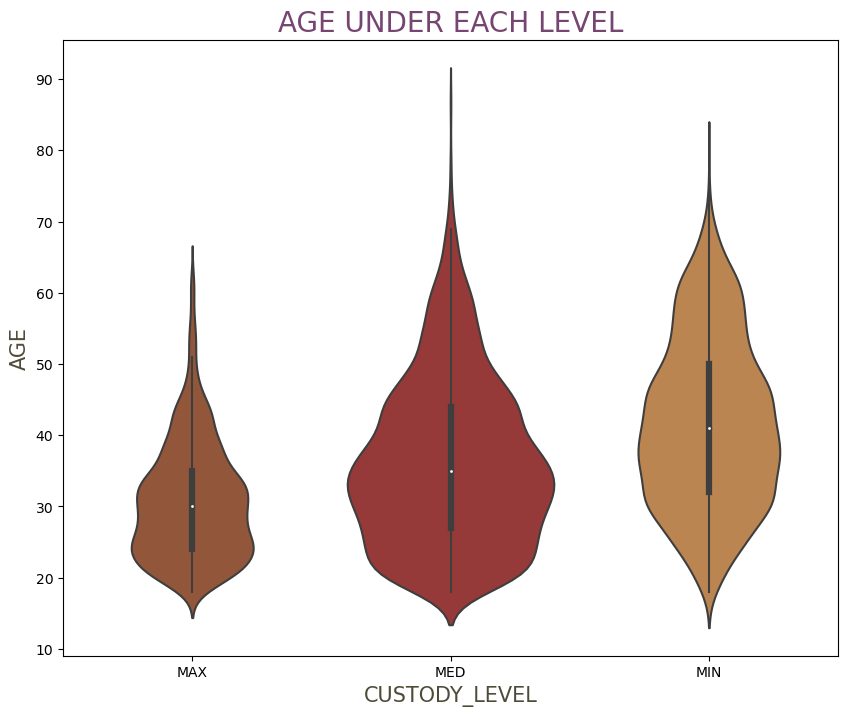

In [194]:
plt.figure(figsize=(10,8))
cols = ["#A0522D","#A52A2A","#CD853F","#F4A460","#DEB887"]
ax = sns.violinplot(x="CUSTODY_LEVEL",y="AGE", data=CU, palette=cols,scale= "count")
ax.set_title("AGE UNDER EACH LEVEL", color="#774571", fontsize = 20)
ax.set_ylabel("AGE", color="#4e4c39", fontsize = 15)
ax.set_xlabel("CUSTODY_LEVEL", color="#4e4c39", fontsize = 15)
plt.show()

In [195]:
#which gender were under custody
print(CU.GENDER.value_counts())

print(CU.GENDER.value_counts(normalize=True))

GENDER
M    7161
F     445
Name: count, dtype: int64
GENDER
M    0.941494
F    0.058506
Name: proportion, dtype: float64


In [196]:
print(CU['RACE'].value_counts())

print(CU['RACE'].value_counts(normalize=True))

RACE
B    4401
O    2376
W     570
A     179
U      61
I      19
Name: count, dtype: int64
RACE
B    0.578622
O    0.312385
W    0.074941
A    0.023534
U    0.008020
I    0.002498
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Men & Women Distribution (RACE = B)')

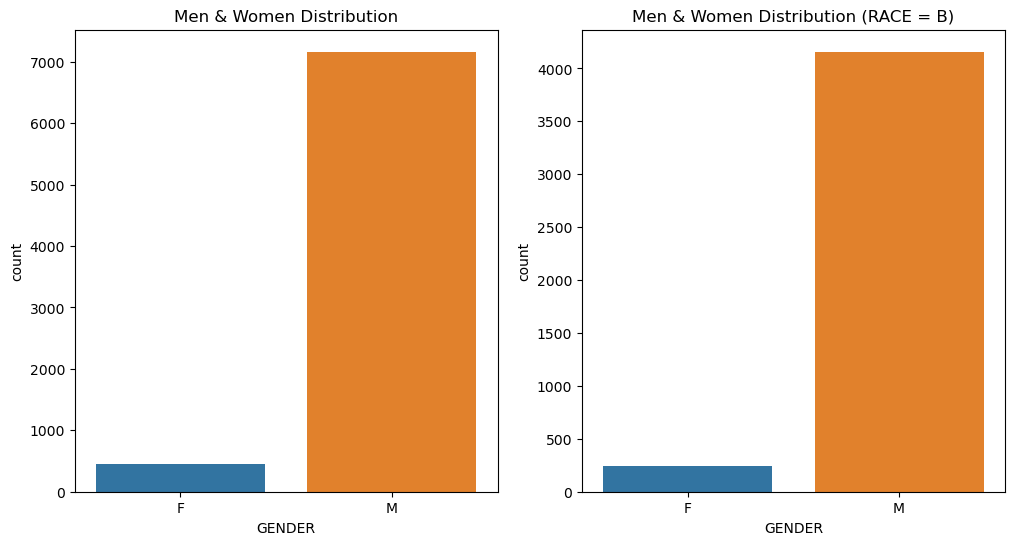

In [197]:
## Lets see which gender were more under custody and 
BLACK_RACE= CU[CU.RACE == 'B']

fig = plt.figure(figsize=(12, 6))

plt.subplot(121)
sns.countplot(x='GENDER', data=CU)
plt.title('Men & Women Distribution')

plt.subplot(122)
sns.countplot(x='GENDER', data=BLACK_RACE)
plt.title('Men & Women Distribution (RACE = B)')

In [198]:
import hvplot.pandas
CU[CU.RACE == 'B'].GENDER.value_counts().hvplot.bar(height=350, width=350)

:Bars   [GENDER]   (count)

In [199]:
CU['RACE'].value_counts().hvplot.barh()

:Bars   [RACE]   (count)

In [200]:
CU[CU.RACE == 'B'].GENDER.value_counts().hvplot.bar(height=350, width=350)

:Bars   [GENDER]   (count)

In [201]:
men = CU.loc[CU['GENDER']=='F', 'RACE'].value_counts().hvplot.barh(alpha=0.3) 
women = CU.loc[CU['GENDER']=='M', 'RACE'].value_counts().hvplot.barh(alpha=0.3)

women * men

:Overlay
   .Bars.Count.I  :Bars   [RACE]   (count)
   .Bars.Count.II :Bars   [RACE]   (count)

Text(0, 0.5, 'INMATES_STATUS')

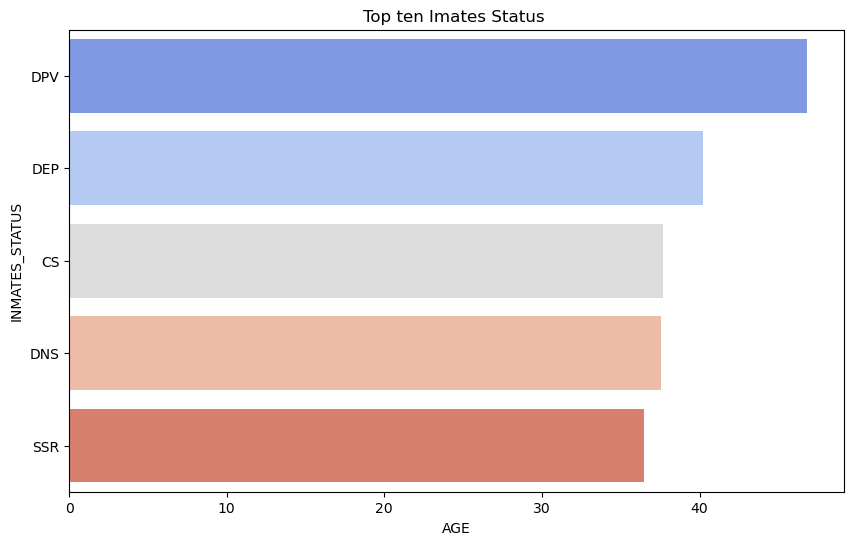

In [210]:
# Top five status
top_STATUS = CU.groupby("INMATE_STATUS_CODE")["AGE"].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))

sns.barplot(x=top_STATUS.values, y=top_STATUS.index, palette="coolwarm")
plt.title("Top ten Imates Status ")
plt.xlabel("AGE")
plt.ylabel("INMATES_STATUS")


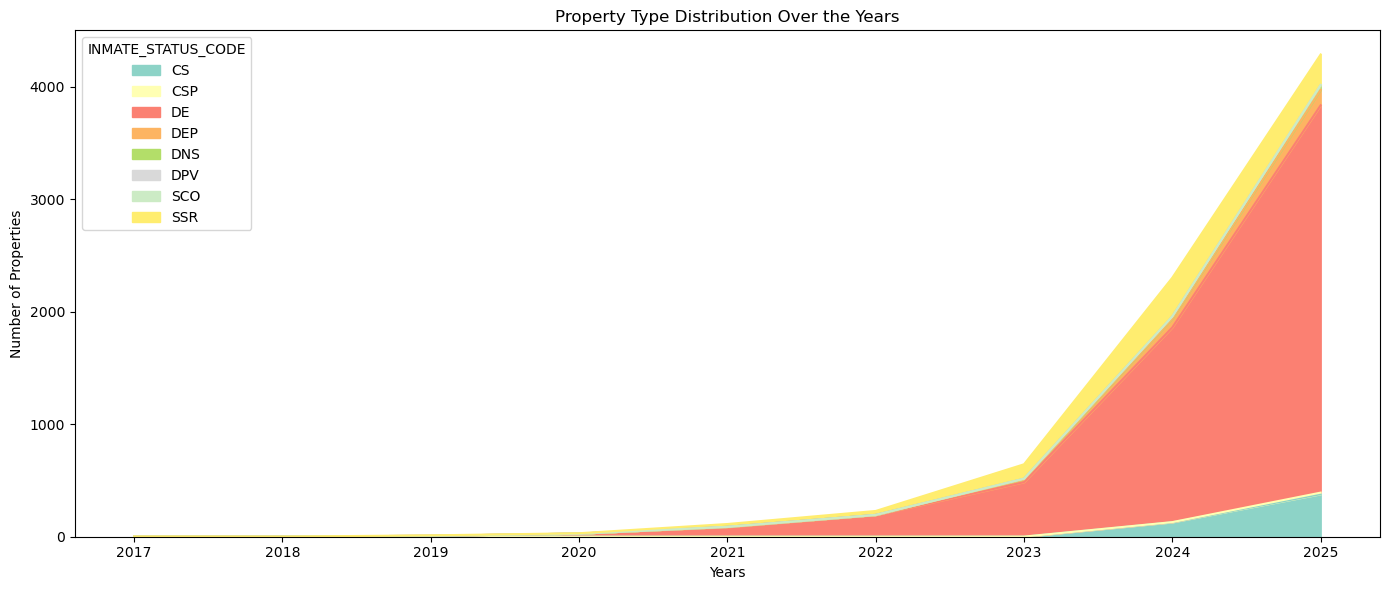

In [209]:
STATUS_YEARS = CU.groupby(["Year", "INMATE_STATUS_CODE"]).size().unstack().fillna(0)

STATUS_YEARS.plot(kind="area", stacked=True, figsize=(14,6), colormap="Set3")
plt.title("Property Type Distribution Over the Years")
plt.xlabel("Years")
plt.ylabel("Number of Properties")
plt.tight_layout()
plt.show()